# MGM Assignment (IIIT-H): Assignment on VQ-VAE for image generation. #

## Pawan Kumar, IIIT-H, Hyderabad, India

## Instructions
* Write answers to questions in this notebook
* You may run this on google colab
* Using GPUs ir recommended
* Use markdown, when answering: create cell, ESC+M to create a markdown cell, you may use $$ to write formula, etc
* Submit this notebook, and figures generated in one zip file, the name of file is your roll number
* Feel free do more than what is asked, for example, on more extensive runs, etc
* You mostly need to run, generate figures and write observations in this assignment

The **Vector Quantized Variational Autoencoder (VQ-VAE)** is a powerful approach to deep learning that builds upon the traditional variational autoencoder (VAE) framework. Introduced by researchers at DeepMind, VQ-VAE leverages the principles of vector quantization to enhance the efficiency and quality of latent space representations, making it particularly useful for tasks like image and audio processing.

### Background on VAEs

Traditional VAEs are generative models that learn to encode input data into a continuous latent space and then decode from this space to reconstruct the input. The VAE framework is grounded in probabilistic graphical models where it attempts to maximize the likelihood of the data while regularizing the encoded representations to adhere to a prior distribution, typically a Gaussian. This helps in generating new data points and manipulating the input data in meaningful ways.

### Introduction of Vector Quantization

Vector Quantization (VQ) introduces a discrete rather than continuous latent representation by mapping the encoder outputs to a finite set of vectors in a high-dimensional space. Each vector, often called a "code" or "embedding," represents a cluster center in the latent space, and each input is encoded to the nearest vector in this set. This quantization step turns the encoder's output into a categorical variable, significantly affecting the model's architecture and the nature of the latent space.

### Key Features of VQ-VAE

1. **Discrete Representation**: Unlike traditional VAEs that operate in a continuous latent space, VQ-VAE's use of vector quantization creates a discrete latent representation. This has shown to improve the model's robustness and the interpretability of the latent space.

2. **High-Quality Reconstruction**: By using a discrete latent space, VQ-VAE can achieve sharper and more coherent reconstructions than standard VAEs, which sometimes produce blurry results. This property is particularly valuable in applications like super-resolution and text-to-speech synthesis.

3. **Stability in Training**: Vector quantization helps stabilize the training of autoencoders by reducing the issue known as "posterior collapse," where the model ignores the latent code.

4. **Efficiency in Encoding**: VQ-VAE models are efficient in encoding information, making them suitable for compressing high-dimensional data like images and audio into a more manageable, compact format.

### Applications

VQ-VAE has been successfully applied in various domains, including but not limited to, image generation, speech synthesis, and music generation. It allows for effective style transfer, anomaly detection in images, and generating high-quality synthetic data.

**Question:** List five papers that use VQ-VAE or some modifications of it.

> Ans: 
> 1. Yan, Wilson, et al. "Videogpt: Video generation using vq-vae and transformers." arXiv preprint arXiv:2104.10157 (2021).
> 2. Saravanan, Akash, and Matthew Guzdial. "Pixel VQ-VAEs for improved pixel art representation." arXiv preprint arXiv:2203.12130 (2022).
> 3. Rivera, Mariano, and Angello Hoyos. "Attentive VQ-VAE." arXiv preprint arXiv:2309.11641 (2023).
> 4. Idoko, Simon, Basant Sharma, and Arun Kumar Singh. "Learning Sampling Distribution and Safety Filter for Autonomous Driving with VQ-VAE and Differentiable Optimization." arXiv preprint arXiv:2403.19461 (2024).
> 5. Wu, Yueh-Kao, Ching-Yu Chiu, and Yi-Hsuan Yang. "JukeDrummer: Conditional Beat-aware Audio-domain Drum Accompaniment Generation via Transformer VQ-VAE." arXiv preprint arXiv:2210.06007 (2022). 


Overall, VQ-VAE represents a significant advancement in the field of autoencoders, combining the strengths of variational inference with the practical benefits of vector quantization to tackle a broad spectrum of challenges in machine learning and artificial intelligence.

# Installing libraries #
The command `!pip install torch torchvision matplotlib numpy scipy six umap-learn` below is a typical usage example of `pip`, the Python package installer. This command is used to install several libraries in one go, and it's often used within Python environments like Jupyter notebooks (where the `!` symbol allows you to run system shell commands). Here's a breakdown of each library mentioned in the command and what it's commonly used for:

1. **`torch`**: This is the PyTorch library, a popular open-source machine learning library developed by Facebook's AI Research lab. It's widely used for applications such as natural language processing and computer vision, particularly because it provides strong support for deep learning models and tensor computations with GPU acceleration.

2. **`torchvision`**: A companion package to PyTorch that specifically targets computer vision tasks. It provides tools for loading and preprocessing image data as well as pre-trained models built with PyTorch that can be used for tasks like image classification, object detection, etc.

3. **`matplotlib`**: A plotting library for Python and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK. It's very useful for visualizing data and model results.

4. **`numpy`**: Stands for Numerical Python, it is a fundamental package for scientific computing with Python. It supports a powerful N-dimensional array object and provides tools for integrating C, C++, and Fortran code. It's widely used for large-scale numerical computations.

5. **`scipy`**: Built on NumPy, SciPy is a library that contains various tools for scientific computing including linear algebra, optimization, integration, and statistics. SciPy is more focused on technical computing than numerical code for generic programming.

6. **`six`**: This is a Python 2 and 3 compatibility library. It provides utility functions for writing code that is portable across Python versions. This is especially useful for maintaining projects that need to run on both Python 2 and Python 3.

7. **`umap-learn`**: This package implements Uniform Manifold Approximation and Projection (UMAP), a machine learning algorithm for dimensionality reduction. It is comparable to t-SNE for visualizing clusters or groups of data points, but often faster and more scalable.

When you execute this command in a Python environment, `pip` will download and install these packages from the Python Package Index (PyPI), allowing you to use them in your Python code. This is particularly useful when setting up a new environment or ensuring that all necessary dependencies are installed for a specific project or notebook.

In [18]:
# from __future__ import print_function


import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter


from six.moves import xrange
from tqdm.notebook import tqdm

import umap

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch.optim as optim

import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid

The code snippet `device = torch.device("cuda" if torch.cuda.is_available() else "cpu")` below is used in PyTorch, a popular deep learning framework, to dynamically set the device for computation based on the availability of a GPU. This allows for more efficient execution of deep learning models where a GPU is available. Here's a breakdown of each component:

1. **`torch.device`**: This is a PyTorch function that returns a device object which can be either a CPU or a GPU. This object can be used to specify where tensors should be allocated.

2. **`"cuda"`**: This is the string identifier for a CUDA device. CUDA is a parallel computing platform and application programming interface model created by Nvidia. Using CUDA allows PyTorch to utilize Nvidia's GPU computing capabilities for substantial speedups in matrix operations, which are central to deep learning.

3. **`torch.cuda.is_available()`**: This function checks if CUDA (GPU support) is available on the system. If a CUDA-capable GPU is present and configured correctly with the necessary drivers and CUDA toolkit, this function will return `True`. 

4. **`"cpu"`**: This is the string identifier for the central processing unit (CPU) of a computer. If no suitable GPU is available, the operations default to the CPU.

5. **Conditional Statement (`"cuda" if torch.cuda.is_available() else "cpu"`)**: This Python ternary conditional operator selects `"cuda"` if `torch.cuda.is_available()` returns `True`, indicating a GPU is available and can be used. Otherwise, it falls back to `"cpu"`.

By assigning the result to the variable `device`, you can then use this device object in your code to ensure that all tensors and computations are placed on the right hardware. For example, you can send a tensor to the chosen device by calling `tensor.to(device)`, which would automatically place it on a GPU if available, or on the CPU otherwise.

This practice is essential for writing flexible, hardware-agnostic PyTorch code that can run on different environments and platforms, optimizing performance when possible by leveraging GPUs.

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Dataset
The code snippet below sets up the training and validation datasets for a machine learning model using the CIFAR-10 dataset in PyTorch. Here’s a detailed breakdown of each component of this code:

### CIFAR-10 Dataset

The CIFAR-10 dataset is a well-known public dataset used for machine learning research. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 test images.

### PyTorch `datasets.CIFAR10`

`datasets.CIFAR10` is a function provided by PyTorch that allows easy downloading and loading of the CIFAR-10 dataset. It has several parameters to control how the data is handled:

- **`root`**: This is the path to the directory where the dataset will be stored. Here, `"data"` means the dataset will be saved in a folder named `data` relative to the current working directory.

- **`train`**: A boolean that specifies whether to load the training subset (`True`) or the test subset (`False`). For the training data, `train=True` is used, and for validation data, `train=False`.

- **`download`**: If `True`, the dataset will be downloaded from the internet if it's not available at the `root` directory.

- **`transform`**: This parameter is used to specify a series of transformations (processing steps) that are applied to the images when they are loaded. Transformations are crucial for normalizing and preparing raw image data for machine learning models.

### Transforms

The `transforms.Compose` function combines several transformations into a single operation. Here, two transformations are applied to both training and validation data:

1. **`transforms.ToTensor()`**: This converts the images from Python Image Library format to PyTorch tensors and scales the image's pixel intensity values from 0-255 to 0-1. This is essential because neural networks typically perform better with input data normalized to a standard scale.

2. **`transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))`**: This normalizes the tensor image data. The first tuple `(0.5, 0.5, 0.5)` specifies the mean for each channel (Red, Green, Blue) to be subtracted, and the second tuple `(1.0, 1.0, 1.0)` specifies the standard deviation for each channel to divide. Given the division by 1.0, this transform essentially shifts the range from [0,1] to [-0.5,0.5] for each channel.

### Practical Usage

- **Training Data**: The variable `training_data` holds the training set, which includes 50,000 images. These are used to train the model.
  
- **Validation Data**: The variable `validation_data` holds the test set, which consists of 10,000 images. These are used to evaluate the performance of the model on unseen data, helping to assess the model's generalizability.

By setting up `training_data` and `validation_data` this way, you can easily load and preprocess the data for use in training and evaluating a deep learning model, leveraging PyTorch's efficient data handling and transformation capabilities.

In [20]:
training_data = datasets.CIFAR10(root="/scratch/fk/data", train=True, download=True,
                                  transform=transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,0.5,0.5), (1.0,1.0,1.0))
                                  ]))

validation_data = datasets.CIFAR10(root="/scratch/fk/data", train=False, download=True,
                                  transform=transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,0.5,0.5), (1.0,1.0,1.0))
                                  ]))

Files already downloaded and verified
Files already downloaded and verified


The line `data_variance = np.var(training_data.data / 255.0)` in Python, using NumPy, computes the variance of the training data for the CIFAR-10 dataset. Let's break down each component of this computation:

1. **`training_data.data`**: This part of the code accesses the `data` attribute of the `training_data` object, which contains the CIFAR-10 training images. Typically, in PyTorch datasets, this attribute holds the raw image data as a NumPy array where the pixel values are integers ranging from 0 to 255. Each entry in this array represents a pixel's intensity across its three color channels (Red, Green, Blue).

2. **`/ 255.0`**: This operation is called normalization and is used to scale the pixel values to a range of 0 to 1. Dividing by 255.0 (the maximum possible pixel value for an 8-bit image) changes the data type to float and scales the data accordingly. Normalizing data is important for many machine learning algorithms because it ensures that the input features (in this case, pixel values) are on a similar scale, which helps the algorithm converge more quickly and efficiently during training.

3. **`np.var()`**: This function calculates the variance of an array. Variance measures how spread out the values in a dataset are around the mean. It's a crucial statistical measure that indicates the variability of the dataset. In the context of image data, a higher variance usually indicates more diverse pixel values and potentially more complex textures and patterns in the images.

   - **Variance Formula**: The variance \(\sigma^2\) is computed as \(\sigma^2 = \frac{1}{N} \sum (x_i - \mu)^2\), where \(x_i\) are the data points, \(\mu\) is the mean of the data, and \(N\) is the number of data points.

4. **`data_variance`**: This variable stores the computed variance value, which might be used later in the training process or in preprocessing steps. For instance, understanding the variance can help in configuring neural network layers or in further normalization steps, like feature scaling or batch normalization.

The calculated variance of the training data can be used to inform the preprocessing and training of a machine learning model, helping to tune the model or adjust its learning parameters to improve performance. Understanding the spread of pixel values across a dataset is essential for developing effective models, particularly in tasks that involve image recognition or classification.

In [21]:
data_variance = np.var(training_data.data / 255.0)

# Vector Quantizer Module

The code snippet below is a Python class implementation of a Vector Quantizer module, typically used as part of a Vector Quantized Variational Autoencoder (VQ-VAE). This class is built using PyTorch, a popular deep learning framework. Let’s walk through the code to understand how it works:

### Class Definition and Initialization
- **`VectorQuantizer(nn.Module)`**: The class `VectorQuantizer` inherits from `nn.Module`, which is the base class for all neural network modules in PyTorch. This inclusion enables easy integration of this module into larger neural network architectures and provides access to many utility functions and hooks.

- **`__init__(self, num_embeddings, embedding_dim, commitment_cost)`**: This is the constructor for the `VectorQuantizer` class. It initializes the module with three key parameters:
  - `num_embeddings`: The number of discrete embeddings (or codes) in the quantization dictionary.
  - `embedding_dim`: The dimensionality of each embedding vector.
  - `commitment_cost`: A scalar that controls the weighting of the loss term that encourages the input to stay close to the quantized output (more on this in class lecture).

- **Embedding Initialization**: The embeddings are stored in an `nn.Embedding` layer, which is initialized with weights uniformly distributed over a small range derived from the number of embeddings. This layer will learn the optimal representations of data points in the embedding space during training.

### Forward Pass
- **Input Transformation**: The input tensor typically has the shape `[batch size, channels, height, width]` (BCHW). It’s first permuted to `[batch size, height, width, channels]` (BHWC) to facilitate operations on the channel dimensions, which aligns with the embedding dimension.

- **Flatten Input**: The input is reshaped into a two-dimensional tensor where each row represents a pixel or small patch from the input, prepared for comparison against the embedding vectors.

- **Distance Calculation**: The distances between each input vector and all embeddings are calculated using an efficient vectorized formula that computes the squared Euclidean distance.

- **Encoding and Quantization**:
  - The closest embedding for each input vector is identified (`encoding_indices`), and a one-hot encoded tensor of these indices is created (`encodings`).
  - The quantized output is then computed by multiplying these encodings with the embedding weights, effectively replacing each input vector with its nearest embedding vector.

- **Loss Calculation**:
  - `e_latent_loss`: The MSE loss between the detached (non-gradient-flowing) quantized output and the original input, which represents the error introduced by the quantization process.
  - `q_latent_loss`: The MSE loss between the quantized output (where gradients are allowed to flow) and a detached copy of the input, used to update the embeddings.
  - The total loss combines these two components, with the commitment cost scaled `e_latent_loss`.

- **Gradient Control**: The line `quantized = inputs + (quantized - inputs).detach()` is crucial as it adjusts the quantized output to be closer to the input while stopping gradients from flowing through the original quantization operation, focusing model updates on improving the embeddings.

- **Perplexity Calculation**: This metric measures how evenly the different embeddings are being used (a higher perplexity indicates more uniform usage), which can be important for diagnosing model training dynamics.

- **Output Transformation and Return**: Finally, the output tensor is permuted back to the original BCHW format (**Quiz:** Which line in the code does this?). The method returns several items including the loss, quantized tensor, perplexity, and the one-hot encodings for potential further analysis or use in the model.

> Ans: quantized.permute(0, 3, 1, 2).contiguous()

This implementation encapsulates the core mechanics of vector quantization within VQ-VAE models, focusing on efficient data representation and learning discrete latent spaces that are useful in various applications such as image compression and generative models.

In [22]:
class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings, embedding_dim, commitment_cost):
        super(VectorQuantizer, self).__init__()
        
        self._embedding_dim = embedding_dim
        self._num_embeddings = num_embeddings
        
        self._embedding = nn.Embedding(self._num_embeddings, self._embedding_dim)
        self._embedding.weight.data.uniform_(-1/self._num_embeddings, 1/self._num_embeddings)
        self._commitment_cost = commitment_cost

    def forward(self, inputs):
        # convert inputs from BCHW -> BHWC
        inputs = inputs.permute(0, 2, 3, 1).contiguous()
        input_shape = inputs.shape
        
        # Flatten input
        flat_input = inputs.view(-1, self._embedding_dim)
        
        # Calculate distances
        distances = (torch.sum(flat_input**2, dim=1, keepdim=True) 
                    + torch.sum(self._embedding.weight**2, dim=1)
                    - 2 * torch.matmul(flat_input, self._embedding.weight.t()))
            
        # Encoding
        encoding_indices = torch.argmin(distances, dim=1).unsqueeze(1)
        encodings = torch.zeros(encoding_indices.shape[0], self._num_embeddings, device=inputs.device)
        encodings.scatter_(1, encoding_indices, 1)
        
        # Quantize and unflatten
        quantized = torch.matmul(encodings, self._embedding.weight).view(input_shape)
        
        # Loss
        e_latent_loss = F.mse_loss(quantized.detach(), inputs)
        q_latent_loss = F.mse_loss(quantized, inputs.detach())
        loss = q_latent_loss + self._commitment_cost * e_latent_loss
        
        quantized = inputs + (quantized - inputs).detach()
        avg_probs = torch.mean(encodings, dim=0)
        perplexity = torch.exp(-torch.sum(avg_probs * torch.log(avg_probs + 1e-10)))
        
        # convert quantized from BHWC -> BCHW
        return loss, quantized.permute(0, 3, 1, 2).contiguous(), perplexity, encodings

# Another Vector Quantizer 

The `VectorQuantizerEMA` class is another implementation of a Vector Quantizer, similar to the `VectorQuantizer` module discussed earlier but with a key difference in how it updates the embedding vectors. The `EMA` in the class name stands for Exponential Moving Average, which this class uses to update the embeddings instead of the straightforward gradient descent method used in the `VectorQuantizer` class. Let's go through the components and highlight the differences:

### Class Definition and Initialization
- The constructor initializes with additional parameters `decay` and `epsilon`, which are specific to the EMA updating mechanism:
  - **`decay`**: This controls the rate at which old observations are down-weighted compared to new data.
  - **`epsilon`**: A small constant (usually `1e-5`) added to prevent division by zero and stabilize calculations.

### Exponential Moving Average (EMA) Mechanics
- **EMA Buffers and Parameters**: Two new properties are initialized for managing the EMA:
  - **`_ema_cluster_size`**: This buffer tracks the size (i.e., the count of data points) of each cluster as a moving average.
  - **`_ema_w`**: This is a parameter that represents the weighted sum of the data points (embeddings) as a moving average.

- These buffers are initialized and then used during the training process to update the embeddings based on the incoming data, smoothed over previous updates.

### Forward Pass Modifications
- **Embedding Updates Using EMA**:
  - During the forward pass, after calculating which embedding each piece of input data is closest to (the encoding), the `_ema_cluster_size` and `_ema_w` are updated:
    - `_ema_cluster_size` is updated using a decay factor to slowly forget older observations.
    - `_ema_w` accumulates the sum of the input vectors, weighted by their respective encodings, also factoring in the decay.
  - The actual embedding weights (`_embedding.weight`) are then recalculated as the ratio of `_ema_w` to `_ema_cluster_size`, which effectively means each embedding vector is the moving average of the inputs assigned to it, normalized by the smoothed count of assignments.

### Loss Computation and Other Outputs
- The loss calculation is simplified compared to the previous module, focusing only on the commitment loss (scaled by `commitment_cost`), which is the mean squared error between the quantized outputs and the inputs.
- The straight-through estimator step remains the same, ensuring that gradients can flow through the quantization step by bypassing the non-differentiable operations. (**Quiz: Which line in the code corresponds to this?**)
> Ans: quantized = inputs + (quantized - inputs).detach()

- The output also includes perplexity calculations, similar to before, providing a measure of how evenly the embeddings are being utilized.

### Key Differences
1. **Embedding Updates**: The primary difference is in how the embedding vectors are updated. The `VectorQuantizerEMA` uses exponential moving averages, which can lead to more stable updates because it incorporates the history of assignments rather than just the current batch. This can be particularly beneficial in environments with noisy data or when data distributions change over time.
2. **Loss Calculation**: The `VectorQuantizerEMA` omits the direct gradient of the quantization loss (`q_latent_loss` from the first class) in the loss function, potentially simplifying the gradient landscape.

Overall, `VectorQuantizerEMA` offers a method that might be more robust to variations in data input, making it potentially more suitable for real-world applications where data distributions are not static. **Question: Verify this claim by comparing with VectorQuantizer and upload figures.**

> Ans: The results are stored in outputs folder

In [66]:
class VectorQuantizerEMA(nn.Module):
    def __init__(self, num_embeddings, embedding_dim, commitment_cost, decay, epsilon=1e-5):
        super(VectorQuantizerEMA, self).__init__()
        
        self._embedding_dim = embedding_dim
        self._num_embeddings = num_embeddings
        
        self._embedding = nn.Embedding(self._num_embeddings, self._embedding_dim)
        self._embedding.weight.data.normal_()
        self._commitment_cost = commitment_cost
        
        self.register_buffer('_ema_cluster_size', torch.zeros(num_embeddings))
        self._ema_w = nn.Parameter(torch.Tensor(num_embeddings, self._embedding_dim))
        self._ema_w.data.normal_()
        
        self._decay = decay
        self._epsilon = epsilon

    def forward(self, inputs):
        # convert inputs from BCHW -> BHWC
        inputs = inputs.permute(0, 2, 3, 1).contiguous()
        input_shape = inputs.shape
        
        # Flatten input
        flat_input = inputs.view(-1, self._embedding_dim)
        
        # Calculate distances
        distances = (torch.sum(flat_input**2, dim=1, keepdim=True) 
                    + torch.sum(self._embedding.weight**2, dim=1)
                    - 2 * torch.matmul(flat_input, self._embedding.weight.t()))
            
        # Encoding
        encoding_indices = torch.argmin(distances, dim=1).unsqueeze(1)
        encodings = torch.zeros(encoding_indices.shape[0], self._num_embeddings, device=inputs.device)
        encodings.scatter_(1, encoding_indices, 1)
        
        # Quantize and unflatten
        quantized = torch.matmul(encodings, self._embedding.weight).view(input_shape)
        
        # Use EMA to update the embedding vectors
        if self.training:
            self._ema_cluster_size = self._ema_cluster_size * self._decay + \
                                     (1 - self._decay) * torch.sum(encodings, 0)
            
            # Laplace smoothing of the cluster size
            n = torch.sum(self._ema_cluster_size.data)
            self._ema_cluster_size = (
                (self._ema_cluster_size + self._epsilon)
                / (n + self._num_embeddings * self._epsilon) * n)
            
            dw = torch.matmul(encodings.t(), flat_input)
            self._ema_w = nn.Parameter(self._ema_w * self._decay + (1 - self._decay) * dw)
            
            self._embedding.weight = nn.Parameter(self._ema_w / self._ema_cluster_size.unsqueeze(1))
        
        # Loss
        e_latent_loss = F.mse_loss(quantized.detach(), inputs)
        loss = self._commitment_cost * e_latent_loss
        
        # Straight Through Estimator
        quantized = inputs + (quantized - inputs).detach()
        avg_probs = torch.mean(encodings, dim=0)
        perplexity = torch.exp(-torch.sum(avg_probs * torch.log(avg_probs + 1e-10)))
        
        # convert quantized from BHWC -> BCHW
        return loss, quantized.permute(0, 3, 1, 2).contiguous(), perplexity, encodings

# Residual Blocks

The provided code defines two Python classes, `Residual` and `ResidualStack`, using PyTorch's deep learning framework. These classes are structured to create residual blocks and a stack of these blocks, respectively, which are commonly used in deep learning architectures to enhance training of deep neural networks by enabling effective backpropagation of gradients. 

Recall the class lectures that residual blocks and similar ideas were proposed in these references: 

* [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)
* [Highway Networks](https://arxiv.org/abs/1505.00387)
* [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597)

Ofcourse, see lecture slides for extensive review of these and more references. 

Let's explore the residual block defined below in detail:

### Class `Residual`
This class implements a single residual block, which is a fundamental component in modern neural network architectures, particularly **useful in constructing deep networks**:

- **Initialization (`__init__`)**:
  - `in_channels`: Number of channels in the input feature map.
  - `num_hiddens`: Number of channels in the output feature map of the block.
  - `num_residual_hiddens`: Number of channels in the intermediate layers within the residual block.

  The residual block consists of two convolutional layers:
  1. The first `nn.Conv2d` layer increases (or decreases) the depth of the input feature map from `in_channels` to `num_residual_hiddens` and uses a 3x3 kernel with padding of 1. This ensures that the output of this layer has the same spatial dimensions as the input.
  2. The second `nn.Conv2d` layer adjusts the depth from `num_residual_hiddens` back to `num_hiddens`, using a 1x1 kernel, effectively allowing the network to learn an appropriate channel-wise transformation.

  Between and after these convolutional layers, ReLU activations are applied to introduce non-linearities into the model.

- **Forward Pass (`forward`)**:
  - The residual block computes the output by adding the input `x` directly to the output of the convolutional block (`self._block(x)`). This addition is the "shortcut connection" that defines a residual block, allowing gradients to flow directly through the network during backpropagation.

### Class `ResidualStack`
This class aggregates multiple `Residual` blocks into a cohesive module, often used in deeper network architectures:

- **Initialization (`__init__`)**:
  - `in_channels`: The number of input channels to the first residual block.
  - `num_hiddens`: The number of output channels for the last convolution in each residual block.
  - `num_residual_layers`: The number of residual blocks to be stacked.
  - `num_residual_hiddens`: The number of channels for the intermediate convolution within each residual block.

  It constructs a list (`nn.ModuleList`) of `Residual` blocks. Each block in this list is instantiated with the same number of input channels, hidden output channels, and residual hidden channels.

- **Forward Pass (`forward`)**:
  - The method sequentially applies each residual block in the stack to the input `x`, where each block's output is used as the next block's input. This creates a deep stack of residual blocks.
  - After all blocks have been applied, a final ReLU activation is applied. This is often done to ensure non-negativity of the output, which can be beneficial for many tasks in deep learning.

### Usage in VQ-VAE
In the context of VQ-VAE (Vector Quantized Variational AutoEncoder), residual blocks and stacks can be used in both the encoder and decoder parts:
- **Encoder**: Helps in effectively compressing the input into a compact latent representation.
- **Decoder**: Assists in reconstructing the input from the quantized latent representation.

Using residual blocks helps mitigate the vanishing gradient problem, enabling deeper architectures by ensuring that the signal (and thus the gradient during training) does not diminish as it passes through many layers. This is particularly crucial in VQ-VAE, where accurate and detailed reconstruction of the input is essential.

In [24]:
class Residual(nn.Module):
    def __init__(self, in_channels, num_hiddens, num_residual_hiddens):
        super(Residual, self).__init__()
        self._block = nn.Sequential(
            nn.ReLU(True),
            nn.Conv2d(in_channels=in_channels,
                      out_channels=num_residual_hiddens,
                      kernel_size=3, stride=1, padding=1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(in_channels=num_residual_hiddens,
                      out_channels=num_hiddens,
                      kernel_size=1, stride=1, bias=False)
        )
    
    def forward(self, x):
        return x + self._block(x)


class ResidualStack(nn.Module):
    def __init__(self, in_channels, num_hiddens, num_residual_layers, num_residual_hiddens):
        super(ResidualStack, self).__init__()
        self._num_residual_layers = num_residual_layers
        self._layers = nn.ModuleList([Residual(in_channels, num_hiddens, num_residual_hiddens)
                             for _ in range(self._num_residual_layers)])

    def forward(self, x):
        for i in range(self._num_residual_layers):
            x = self._layers[i](x)
        return F.relu(x)

# Encoder Module of VQ-VAE

The `Encoder` class defined in the code snippet is a specialized neural network module using PyTorch, designed to encode input data (typically images) into a compressed latent representation. This type of encoder is often used in architectures like autoencoders, including Vector Quantized Variational AutoEncoders (VQ-VAE), for tasks such as image compression, noise reduction, and feature extraction. Here’s a detailed breakdown of each component:

### Class Definition
The `Encoder` class extends `nn.Module`, making it a custom module in PyTorch. It's tailored to take an input with a specific number of channels and process it through multiple layers to produce a condensed feature map.

### Constructor (`__init__`)
The constructor initializes the encoder with several layers and configurations:
- **Parameters**:
  - `in_channels`: The number of channels in the input images (e.g., 3 for RGB images).
  - `num_hiddens`: The number of channels (features) in the hidden layers. This parameter influences the capacity of the encoder.
  - `num_residual_layers`: The number of residual blocks in the residual stack.
  - `num_residual_hiddens`: The number of channels in the intermediate layers within each residual block.

- **Convolutional Layers**:
  - `_conv_1`: The first convolutional layer reduces the spatial dimensions of the input by half (due to `stride=2`) and reduces the channel depth from `in_channels` to `num_hiddens//2`. The kernel size of 4x4 and padding of 1 are typical for capturing spatial hierarchies while downsampling.
  - `_conv_2`: The second convolutional layer further reduces the spatial dimensions by half and increases the channel depth from `num_hiddens//2` to `num_hiddens`. This layer continues to compress and encode higher-level features from the input.
  - `_conv_3`: The third convolutional layer keeps the spatial dimensions the same (due to `stride=1`) and maintains the channel depth, processing the features further with a smaller 3x3 kernel.

- **Residual Stack**:
  - `_residual_stack`: An instance of the `ResidualStack` class, which processes the output of the last convolutional layer through a series of residual blocks. This stack helps in building a deep network while mitigating the vanishing gradient problem, allowing the network to learn more complex patterns without losing significant information through the depth.

### Forward Pass (`forward`)
- The `forward` method defines how the input data flows through the encoder:
  - The input is first processed by `_conv_1`, followed by a ReLU activation function (`F.relu`), which introduces non-linearity to the model and helps capture complex patterns in the data.
  - The output from the first layer is then fed into `_conv_2`, followed again by a ReLU activation.
  - The output of `_conv_2` passes through `_conv_3`, which prepares the data for the residual stack by adjusting the feature map without changing its size.
  - Finally, the output of `_conv_3` is passed through the `_residual_stack`, where it undergoes further transformation by the multiple residual blocks.

### Purpose and Usage
In the context of VQ-VAE, the `Encoder` plays a crucial role in compressing the input image into a dense representation, which is then quantized and reconstructed by the decoder. The use of convolutional and residual layers enables the encoder to efficiently capture both local and global features in the input, which are essential for high-quality image reconstruction in the decoder phase. This structured approach to deep learning model design facilitates the training of robust and efficient models capable of handling complex tasks in image and video processing.

In [25]:
class Encoder(nn.Module):
    def __init__(self, in_channels, num_hiddens, num_residual_layers, num_residual_hiddens):
        super(Encoder, self).__init__()

        self._conv_1 = nn.Conv2d(in_channels=in_channels,
                                 out_channels=num_hiddens//2,
                                 kernel_size=4,
                                 stride=2, padding=1)
        self._conv_2 = nn.Conv2d(in_channels=num_hiddens//2,
                                 out_channels=num_hiddens,
                                 kernel_size=4,
                                 stride=2, padding=1)
        self._conv_3 = nn.Conv2d(in_channels=num_hiddens,
                                 out_channels=num_hiddens,
                                 kernel_size=3,
                                 stride=1, padding=1)
        self._residual_stack = ResidualStack(in_channels=num_hiddens,
                                             num_hiddens=num_hiddens,
                                             num_residual_layers=num_residual_layers,
                                             num_residual_hiddens=num_residual_hiddens)

    def forward(self, inputs):
        x = self._conv_1(inputs)
        x = F.relu(x)
        
        x = self._conv_2(x)
        x = F.relu(x)
        
        x = self._conv_3(x)
        return self._residual_stack(x)

# Decoder of VQ-VAE

The `Decoder` class provided below is designed to reconstruct data from a compressed encoding back to its original form, typically used in architectures like autoencoders and, more specifically, Vector Quantized Variational AutoEncoders (VQ-VAE). This class also extends `nn.Module`, making it a custom PyTorch module. Let's explore the structure and functionality of this decoder:

### Class Definition
- The `Decoder` is initialized with parameters that define the architecture of the network, including the number of channels and layers, similar to how an encoder is configured but working in reverse.

### Constructor (`__init__`)
- **Parameters**:
  - `in_channels`: The number of channels in the input feature map (i.e., the output from the encoder or the latent space).
  - `num_hiddens`: The number of channels in the hidden layers, defining the capacity of the decoder.
  - `num_residual_layers`: The number of residual blocks within the residual stack.
  - `num_residual_hiddens`: The number of channels in the intermediate layers within each residual block.

- **Layers**:
  - **`_conv_1`**: A convolutional layer that processes the input features without changing their spatial dimensions (due to `stride=1` and `padding=1`). It uses a 3x3 kernel, which is standard for processing feature maps without altering their size.
  - **`_residual_stack`**: Similar to the encoder, this is a stack of residual blocks (using the `ResidualStack` class) that further processes the features. The residual stack is crucial for allowing the decoder to effectively learn and represent complex patterns, aiding in accurate reconstruction.
  - **`_conv_trans_1`**: A transposed convolutional layer (often called deconvolution), which increases the spatial dimensions of the feature map. It essentially performs the opposite of a convolution by mapping the input feature map to a larger output map, thus starting to upscale the image back to its original size. It reduces the number of channels from `num_hiddens` to `num_hiddens//2`.
  - **`_conv_trans_2`**: Another transposed convolutional layer that further upscales the feature map and reduces the channel depth to match the original input's channel count (typically 3 for RGB images), completing the reconstruction of the image.

### Forward Pass (`forward`)
- The forward pass of the decoder details how the input data flows through it:
  1. **Initial Convolution**: The input is first processed by `_conv_1`, which prepares the encoded features for further upscaling.
  2. **Residual Processing**: The output from `_conv_1` is passed through the `_residual_stack`, which refines and enriches the feature representations without altering their size.
  3. **Upscaling**: The refined features are then passed through `_conv_trans_1`, where they are upscaled and the channel depth is reduced. A ReLU activation follows to introduce non-linearity.
  4. **Final Reconstruction**: The output of the first transposed convolution layer is processed by `_conv_trans_2`, which further upscales the features to match the original dimensions of the input image.

### Purpose and Usage
- In a VQ-VAE, the decoder's role is critical as it must reconstruct high-fidelity output from a quantized, compressed representation of the original input. The quality of reconstruction depends heavily on the design of the decoder, including the effectiveness of its residual blocks and upsampling layers.
- By employing residual blocks, the decoder can maintain or enhance feature quality through deeper layers, facilitating better reconstruction. The transposed convolution layers gradually restore the spatial dimensions necessary for achieving outputs that closely resemble the original inputs.

This architecture is particularly useful for tasks where lossless or near-lossless reconstruction is crucial, such as in image and video processing applications. The use of transposed convolutions helps in achieving smoother and more detailed outputs compared to simpler upscaling methods.

In [26]:
class Decoder(nn.Module):
    def __init__(self, in_channels, num_hiddens, num_residual_layers, num_residual_hiddens):
        super(Decoder, self).__init__()
        
        self._conv_1 = nn.Conv2d(in_channels=in_channels,
                                 out_channels=num_hiddens,
                                 kernel_size=3, 
                                 stride=1, padding=1)
        
        self._residual_stack = ResidualStack(in_channels=num_hiddens,
                                             num_hiddens=num_hiddens,
                                             num_residual_layers=num_residual_layers,
                                             num_residual_hiddens=num_residual_hiddens)
        
        self._conv_trans_1 = nn.ConvTranspose2d(in_channels=num_hiddens, 
                                                out_channels=num_hiddens//2,
                                                kernel_size=4, 
                                                stride=2, padding=1)
        
        self._conv_trans_2 = nn.ConvTranspose2d(in_channels=num_hiddens//2, 
                                                out_channels=3,
                                                kernel_size=4, 
                                                stride=2, padding=1)

    def forward(self, inputs):
        x = self._conv_1(inputs)
        
        x = self._residual_stack(x)
        
        x = self._conv_trans_1(x)
        x = F.relu(x)
        
        return self._conv_trans_2(x)

In [27]:
batch_size = 256
num_training_updates = 5000

num_hiddens = 128
num_residual_hiddens = 32
num_residual_layers = 2

embedding_dim = 64
num_embeddings = 512

commitment_cost = 0.25

decay = 0.99

learning_rate = 1e-3

The code snippet below creates a `DataLoader` in PyTorch, which is a critical component for efficiently managing and iterating over datasets during the training of machine learning models. Here's a breakdown of each component and how they contribute to the data loading and training process:

### DataLoader
`DataLoader` is a class provided by PyTorch that abstracts the complexity of handling datasets. It offers a convenient way to iterate over datasets with the ability to batch, shuffle, and load the data asynchronously using multiprocessing workers.

### Parameters
- **`training_data`**: This is the dataset to be loaded. It should be an instance of a dataset class from `torch.utils.data.Dataset` or a custom dataset class that you've defined, which includes methods to get the data items and their labels. In this context, `training_data` might be the CIFAR-10 dataset prepared for training as discussed earlier.

- **`batch_size`**: This parameter specifies the number of data items (e.g., images, records) to be processed in each batch. The choice of batch size can affect model performance and training dynamics. A larger batch size can lead to faster processing through parallelism but might require more memory and could potentially lead to a less stable training process in terms of convergence.

- **`shuffle`**: When set to `True`, the data loader will shuffle the order of the dataset at the beginning of each epoch. Shuffling is important for training deep learning models as it prevents the model from learning anything about the sequence of the data, reducing the chance of overfitting and helping the model generalize better.

- **`pin_memory`**: Setting this parameter to `True` is particularly useful when training models using a GPU. It instructs the data loader to load the dataset into the page-locked (pinned) memory, which enables faster data transfer to CUDA-enabled GPUs. Pinned memory acts as a non-swappable memory area that can be accessed by device drivers and DMA (Direct Memory Access) hardware. This setting can lead to more efficient memory handling, thereby speeding up input data loading.

### Usage
Once the `DataLoader` is set up with the specified parameters, it can be used in a training loop. Here is a simple example of how it might be used:
```python
for epoch in range(total_epochs):
    for data, labels in training_loader:
        # Move the data and labels to device (e.g., GPU)
        data = data.to(device)
        labels = labels.to(device)

        # Clear gradients, perform forward pass, compute loss, perform backward pass, and update weights
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
```
This loop will go through the dataset in batches, automatically handling the shuffling and memory management aspects, thus allowing the model training to focus on learning from the data rather than data handling logistics. We will see how we will use this for VQ-VAE below.

In [28]:
training_loader = DataLoader(training_data, 
                             batch_size=batch_size, 
                             shuffle=True,
                             pin_memory=True)

The `validation_loader` below is another instance of a PyTorch `DataLoader`, specifically set up for handling validation data during the training process of a machine learning model. This is similar to the `training_loader`, but it serves a different purpose. Let's break down the setup and usage of this `DataLoader`:

<!-- ### DataLoader
PyTorch's `DataLoader` is designed to efficiently manage datasets, providing easy-to-implement options for batching, shuffling, and loading data. It automates the process of generating data batches during model training and validation, which are crucial for evaluating the performance of the model on data it has not been trained on. -->

### Parameters
- **`validation_data`**: This refers to the dataset used for the model validation. Typically, this dataset is separate from the training dataset and is used to check the model's performance against unseen data. The validation dataset should not influence the training process directly but is used to monitor model generalization and to tune hyperparameters.

- **`batch_size=32`**: This specifies that the DataLoader should retrieve 32 data items at a time. This is the size of each batch that will be fed into the model during a validation pass. The choice of batch size can affect computational efficiency and the stability of model evaluation metrics.

- **`shuffle=True`**: Although shuffling is generally more critical during training to prevent the model from learning unintended patterns from the order of the data, it is also used here. For validation purposes, shuffling can help in ensuring that the validation results are not biased by any specific order of data, especially if the model might be sensitive to the order in which data batches are presented.

- **`pin_memory=True`**: As with the training DataLoader, setting this to `True` helps in speeding up data transfers from CPU to GPU by using page-locked memory. This is especially beneficial when validating on a GPU, as it reduces the data transfer time between the CPU and GPU, making the validation steps run faster.

### Usage in Validation
The validation DataLoader is typically used in a similar loop structure as the training DataLoader but within a different part of the model training script, often after a training epoch is completed:
```python
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Turn off gradients, since we don't need them for validation
    for data, labels in validation_loader:
        data = data.to(device)
        labels = labels.to(device)
        outputs = model(data)
        val_loss = criterion(outputs, labels)
        # Accumulate validation loss, calculate validation metrics
```
In this context, `model.eval()` switches the model to evaluation mode, turning off specific layers like dropout or batch normalization that behave differently during training vs. during testing/validation. The `torch.no_grad()` context manager ensures that the computation graph is not stored (which saves memory and computations).

The main goal of using `validation_loader` is to monitor the model's performance on the validation dataset at regular intervals during training, allowing for early stopping or model adjustments before overfitting or underfitting occurs. This setup ensures that the evaluation of the model is efficient and effective, contributing to better overall training outcomes.

In [29]:
validation_loader = DataLoader(validation_data,
                               batch_size=32,
                               shuffle=True,
                               pin_memory=True)

# Model Class

The `Model` class provided below encapsulates a complete architecture for a Vector Quantized Variational AutoEncoder (VQ-VAE), which is a type of generative model that learns to compress data into a discrete latent representation and then reconstructs the input from this representation. As mentioned before, this architecture is particularly useful for tasks where discrete representations are advantageous, such as in generating new content that is similar to the training data, or in applications where compression is required. Here's a breakdown of the components and flow of the `Model` class:

### Class Definition
- Inherits from `nn.Module`, which is the base class for all neural network modules in PyTorch. This inheritance makes it easy to create custom models with manageable components.

### Constructor (`__init__`)
- **Parameters**:
  - `num_hiddens`: The number of hidden channels in the encoder and decoder networks.
  - `num_residual_layers`: The number of residual layers in the encoder and decoder's residual stacks.
  - `num_residual_hiddens`: The number of channels in the intermediate layers within each residual block.
  - `num_embeddings`: The number of discrete embeddings in the vector quantizer.
  - `embedding_dim`: The dimensionality of each embedding vector.
  - `commitment_cost`: A weighting factor for the loss term that penalizes the distance between the encoder outputs and the nearest embedding vector, encouraging the encoder to produce outputs close to the existing embeddings.
  - `decay`: An optional parameter that, if greater than 0, indicates the model should use the exponential moving average strategy (`VectorQuantizerEMA`) for updating embeddings. Otherwise, it uses the basic `VectorQuantizer`.

- **Components**:
  - `_encoder`: An instance of the `Encoder` class that processes the input and reduces it to a feature-rich compressed form.
  - `_pre_vq_conv`: A convolutional layer that adapts the number of channels from the encoder output to match the embedding dimension required by the vector quantizer.
  - `_vq_vae`: Depending on the `decay` parameter, it either initializes a `VectorQuantizerEMA` or a `VectorQuantizer`. This component is crucial for transforming the continuous latent space representation from the encoder into a discrete one, and it also computes part of the model's loss.
  - `_decoder`: An instance of the `Decoder` class that takes the quantized (discrete) representation and reconstructs the input data.

### Forward Pass (`forward`)
- **Flow**:
  1. **Encoding**: The input `x` is passed through the `_encoder`, which compresses it into a dense feature representation `z`.
  2. **Pre-Vector Quantization Convolution**: The output `z` from the encoder is further processed by `_pre_vq_conv`, adapting its dimensionality to match that required by the vector quantizer.
  3. **Vector Quantization**: `z` is then fed into `_vq_vae`, which quantizes it into a discrete form. This step also calculates the vector quantization loss, the output quantized representation, and the perplexity (which measures how well the embedding space is being used).
  4. **Decoding**: The quantized representation is decoded by `_decoder` into `x_recon`, which is the reconstruction of the original input.

- **Outputs**:
  - `loss`: The loss calculated by the vector quantizer, which includes the commitment loss and possibly other components depending on the specifics of the vector quantizer used.
  - `x_recon`: The reconstructed input, which is the output of the decoder.
  - `perplexity`: A metric that provides insight into the usage of the embedding space (a higher perplexity indicates a more effective and uniform use of the embeddings).

### Summary
This model is designed to leverage the strengths of convolutional neural networks, residual learning, and vector quantization for efficient data encoding and reconstruction, making it suitable for applications in image and audio processing where maintaining high fidelity is crucial. The architecture also allows for flexibility in the quantization method, which can be crucial for adapting the model to different requirements and data characteristics.

In [30]:
class Model(nn.Module):
    def __init__(self, num_hiddens, num_residual_layers, num_residual_hiddens, 
                 num_embeddings, embedding_dim, commitment_cost, decay=0):
        super(Model, self).__init__()
        
        self._encoder = Encoder(3, num_hiddens,
                                num_residual_layers, 
                                num_residual_hiddens)
        self._pre_vq_conv = nn.Conv2d(in_channels=num_hiddens, 
                                      out_channels=embedding_dim,
                                      kernel_size=1, 
                                      stride=1)
        if decay > 0.0:
            self._vq_vae = VectorQuantizerEMA(num_embeddings, embedding_dim, 
                                              commitment_cost, decay)
        else:
            self._vq_vae = VectorQuantizer(num_embeddings, embedding_dim,
                                           commitment_cost)
        self._decoder = Decoder(embedding_dim,
                                num_hiddens, 
                                num_residual_layers, 
                                num_residual_hiddens)

    def forward(self, x):
        z = self._encoder(x)
        z = self._pre_vq_conv(z)
        loss, quantized, perplexity, _ = self._vq_vae(z)
        x_recon = self._decoder(quantized)

        return loss, x_recon, perplexity

In [53]:
model = Model(num_hiddens, num_residual_layers, num_residual_hiddens,
              num_embeddings, embedding_dim, 
              commitment_cost, 0).to(device)

# Optimizer for Training VQ-VAE Loss

The code snippet below initializes an optimizer for training a neural network model in PyTorch, specifically using the Adam optimization algorithm. This optimizer is assigned to manage and update the parameters of the specified `model`. Here's a breakdown of the components and their implications for training the neural network:

### Optimizer
- **`optim.Adam`**: This is an invocation of the Adam (Adaptive Moment Estimation) optimizer from PyTorch's `optim` module. Adam is a popular optimization algorithm in machine learning because it combines the best properties of the AdaGrad and RMSProp algorithms to handle sparse gradients on noisy problems.

### Parameters
- **`model.parameters()`**: This function call retrieves all the trainable parameters (weights and biases) from the model. These parameters are what the optimizer will update during the training process.

- **`lr=learning_rate`**: This sets the learning rate for the optimizer. The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the right learning rate is crucial for good training performance, as a value too small might lead to a long training process, and a value too large might lead to overshooting minima.

- **`amsgrad=False`**: This is a parameter specific to the Adam optimizer. `amsgrad` is a variant of the Adam optimizer that modifies the algorithm to provide a theoretical guarantee for convergence. Setting it to `False` uses the original Adam algorithm, which is empirically strong across a variety of tasks. If set to `True`, it can provide more stability in the convergence of the training process at the cost of using more memory and potentially more computation.

### Usage
The optimizer is used during the training loop to update the weights of the model based on the gradients computed from the loss function. Here’s a simplistic view of how it might be used within a training loop:

```python
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    for inputs, labels in dataloader:  # Loop over each batch from the data loader
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass: compute the predicted outputs
        loss = loss_function(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass: compute the gradient of the loss with respect to model parameters
        optimizer.step()  # Perform a single optimization step (parameter update)
```

In this loop:
- **`optimizer.zero_grad()`** clears old gradients; otherwise, gradients would be accumulated from all forward passes.
- **`loss.backward()`** computes the derivative of the loss function with respect to the parameters (or weights) of the model.
- **`optimizer.step()`** updates the parameters according to the optimization strategy.

Using the Adam optimizer helps in fine-tuning the model efficiently, especially with datasets that have noisy and/or sparse gradients. This optimizer dynamically adapts the learning rate for each parameter and bases updates on the first two moments of the gradients, making it robust across a wide range of tasks and model architectures.

In [54]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate, amsgrad=False)

# Training Loop

The code below is a training loop for a neural network model in PyTorch, specifically designed for training a model that includes a vector quantization component like a VQ-VAE (Vector Quantized Variational AutoEncoder). This loop is structured to handle batches of data, compute losses, perform backpropagation, and update the model's parameters. Here's a detailed breakdown and explanation of each part of the loop:

### Setup for Training
- **`model.train()`**: This call sets the model to training mode. This is important because certain layers like dropout or batch normalization behave differently during training than during evaluation.

### Data Structures for Tracking Metrics
- **`train_res_recon_error`** and **`train_res_perplexity`**: These are lists used to record the reconstruction error and perplexity after each training iteration. Tracking these metrics helps monitor the training process and evaluate the model's performance over time.

### Training Loop
- **`for i in xrange(num_training_updates):`**: This loop iterates over the training process for a specified number of updates (`num_training_updates`). Note that `xrange` is used in Python 2 and is equivalent to `range` in Python 3.

### Inside the Loop
1. **Data Loading**:
   - **`(data, _) = next(iter(training_loader))`**: This extracts the next batch of data from the `training_loader`. The underscore `_` is used to ignore the second element returned (typically labels, which are not needed for this type of model).
   - **`data = data.to(device)`**: Moves the data to a computing device (CPU or GPU). This step is crucial for performance when using GPUs for computation.

2. **Gradient Initialization**:
   - **`optimizer.zero_grad()`**: Resets gradients of the optimizer before starting backpropagation. Gradients need to be cleared to prevent accumulation from previous iterations.

3. **Model Forward Pass**:
   - **`vq_loss, data_recon, perplexity = model(data)`**: Runs a forward pass of the model. It returns the vector quantization loss, the reconstructed data, and the perplexity metric.

4. **Loss Calculation**:
   - **`recon_error = F.mse_loss(data_recon, data) / data_variance`**: Calculates the Mean Squared Error (MSE) between the reconstructed data and the original data, normalized by the data variance. This normalization could help to standardize the error measure, making it less dependent on the scale of the dataset.
   - **`loss = recon_error + vq_loss`**: Total loss is the sum of the reconstruction error and the VQ loss, combining these to form a single scalar to optimize.

5. **Backpropagation and Parameter Update**:
   - **`loss.backward()`**: Computes the gradients of the loss with respect to the model parameters.
   - **`optimizer.step()`**: Updates the model parameters based on the computed gradients.

### Logging and Tracking
- **Appending Metrics**:
  - **`train_res_recon_error.append(recon_error.item())`** and **`train_res_perplexity.append(perplexity.item())`**: Adds the current batch's reconstruction error and perplexity to the lists for later analysis.
  
- **Periodic Logging**:
  - **`if (i+1) % 100 == 0:`**: Every 100 iterations, print statistics about the last 100 iterations:
    - **`print('%d iterations' % (i+1))`**: Outputs the current iteration number.
    - **`print('recon_error: %.3f' % np.mean(train_res_recon_error[-100:]))`** and **`print('perplexity: %.3f' % np.mean(train_res_perplexity[-100:]))`**: Computes and prints the mean of the last 100 recorded values for reconstruction error and perplexity, providing insight into the model's recent performance.

### Summary
This training loop is well-structured for models involving complex loss computations like those found in VQ-VAE, which need to handle both reconstruction quality and the properties of the latent space. 

**Question: Point out these lines in code:** The loop efficiently handles data loading, loss computation, backpropagation, parameter updates, and periodic logging, making it suitable for extensive training sessions over large datasets.

In [ ]:
model.train()
train_res_recon_error = []
train_res_perplexity = []

for i in tqdm(range(num_training_updates)):
    (data, _) = next(iter(training_loader))
    data = data.to(device)
    optimizer.zero_grad()

    vq_loss, data_recon, perplexity = model(data)
    recon_error = F.mse_loss(data_recon, data) / data_variance
    loss = recon_error + vq_loss
    loss.backward()

    optimizer.step()
    
    train_res_recon_error.append(recon_error.item())
    train_res_perplexity.append(perplexity.item())

    if (i+1) % 100 == 0:
        print('%d iterations' % (i+1))
        print('recon_error: %.3f' % np.mean(train_res_recon_error[-100:]))
        print('perplexity: %.3f' % np.mean(train_res_perplexity[-100:]))
        print()
        
    if i % 200 == 0:
        img = make_grid(data_recon.cpu().data[:48])+0.5
        img = img.numpy().transpose(1, 2, 0)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Epoch: {i}')
        plt.savefig(f'./outputs/{i}.png')
        print("Image saved")

        

In the following, we would like to smooth the error so that plots dont look scary. For this we will use *Savitzky-Golay filter*. 

The savgol_filter function in this context refers to the Savitzky-Golay filter, a digital filter used for smoothing a set of digital data points. It is commonly used in signal processing to "smooth" noisy data, while preserving the shape and features of the signal, such as relative maxima, minima, and width. Let's break down the parameters of the savgol_filter function:

* **Input Data (train_res_recon_error):** This is the data array that you want to smooth using the filter. It typically represents a series of measurements or signal values.

* **Window Length (201):** This is the size of the filter window, meaning the filter will take into account 201 data points around each point to compute a new smoothed value. The window length must be a positive odd integer.

* **Polynomial Order (7):** This specifies the order of the polynomial used to fit the samples within the window. The polynomial order must be less than the window length. A higher polynomial order can fit the windowed samples with a more complex curve, which can be useful for capturing finer details in the data.

In use, the savgol_filter function will apply a polynomial smoothing to the train_res_recon_error data array over a window of 201 points, fitting a 7th-degree polynomial to the data within each window. This can help reduce noise and make trends in the data more apparent, while maintaining the integrity of the signal's high-frequency components.

Reference: [Click here](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter)


In [56]:
train_res_recon_error_smooth = savgol_filter(train_res_recon_error, 201, 7)
train_res_perplexity_smooth = savgol_filter(train_res_perplexity, 201, 7)

The code snippet you see below `ax = f.add_subplot(1,2,1)` is typically used in Python's Matplotlib library, a popular plotting library for creating static, interactive, and animated visualizations in Python. Here's what each part of this snippet means:

1. **`f`**: This variable is a figure object in Matplotlib, which serves as a container for all plot elements. A figure object can contain one or more subplots (axes), which are actual plots.

2. **`add_subplot(1, 2, 1)`**: This method is used to add a subplot to the figure `f`. The method's arguments `(1, 2, 1)` define how the subplots are arranged and which subplot is being referred to:
   - The first argument (`1`) indicates the number of rows of subplots the figure should have.
   - The second argument (`2`) indicates the number of columns of subplots the figure should have.
   - The third argument (`1`) is the index of the subplot to create or activate. Subplot indices start at 1 (not 0), and increase across rows and then down columns.

   In this specific case, `add_subplot(1, 2, 1)` means "create a subplot in a grid that has 1 row and 2 columns, and activate the first (left) subplot of this grid." 

As a result of this line of code, `ax` is now an AxesSubplot object that represents the left subplot of a figure that will contain exactly two side-by-side subplots. You can then use `ax` to plot graphs, set plot titles, labels, and other plot elements.

**Quiz (Plotting in Python)**

* What does ax = f.add_subplot(1,2,1) do in the following code?
> Ans: It creates the first subplot and returx the ax object 
* Write code line (only write here) to add plot at (5,2) grid position in a (10,10) grid. Here each grid point refers to a figure plot. 
> Ans: ax = f.add_subplot(10, 10, 52) # assuming 5 is the row index and 2 is the col index

Text(0.5, 0, 'iteration')

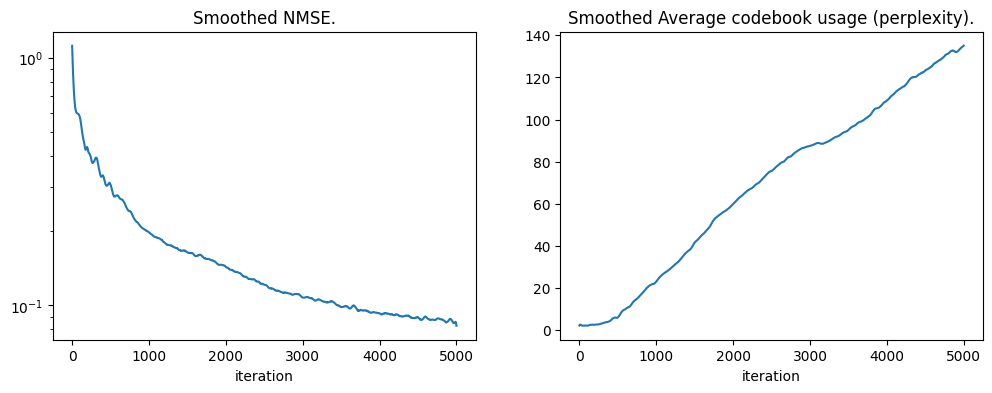

In [57]:
f = plt.figure(figsize=(12, 4))
ax = f.add_subplot(1,2,1)
ax.plot(train_res_recon_error_smooth)
ax.set_yscale('log')
ax.set_title('Smoothed NMSE.')
ax.set_xlabel('iteration')

ax = f.add_subplot(1,2,2)
ax.plot(train_res_perplexity_smooth)
ax.set_title('Smoothed Average codebook usage (perplexity).')
ax.set_xlabel('iteration')

# Model.eval()

The `model.eval()` method is used in many machine learning frameworks, such as PyTorch, to set a model into evaluation mode. This is important when you are no longer training the model, but want to assess its performance on validation or test data. Here's what happens and why it's important:

1. **Disables Training Specific Behaviors**: Many models, especially in deep learning, behave differently during training and testing. For instance, layers like dropout and batch normalization function differently:
   - **Dropout**: During training, dropout randomly zeroes some of the elements of the input tensor with a probability p, which is a technique for preventing overfitting. During evaluation, dropout is disabled, and all features are used (no elements are zeroed).
   - **Batch Normalization**: During training, this layer normalizes its output using the mean and standard deviation of the current batch of inputs. For evaluation, it uses the running averages of these statistics, which were learned during training. 

2. **Consistency**: Using `model.eval()` ensures that the model's forward passes are consistent and not dependent on any random behavior specified during the training phase, such as dropout. This is crucial for getting reliable and reproducible results during model evaluation.

3. **Performance Evaluation**: It prepares the model for performance evaluation or inference on unseen data. It tells the model that it should not expect any further changes to its parameters and that it should use its learned parameters as they are.

In short, the `model.eval()` method is crucial for correctly and fairly assessing the performance of a neural network or any model that contains elements with different behaviors during training versus testing. This method helps to ensure that the model's predictions are based on learned patterns rather than artifacts of the training environment.

**Quiz (machine learning) (5 marks)**
* What is dropout in machine learning? Write in less than 5 lines. 
> Ans: Dropout is a regularization technique in machine learning where randomly selected neurons are ignored during training to prevent overfitting and improve generalization performance.
* What is Batch normalization in machine learning. Write in less than 5 lines.
> Ans: Batch normalization is a technique in machine learning used to improve the training speed, stability, and performance of neural networks by normalizing the inputs of each layer to have zero mean and unit variance across mini-batches.
* What are random behaviours in a forward pass discussed above?
> Ans: Random behaviors in a forward pass could refer to techniques like dropout or data augmentation where random transformations or activations are applied to the input or hidden layers during training to introduce variability and prevent overfitting.
* What happens to batch normalization layers during model.eval()?
> Ans: During `model.eval()`, batch normalization layers use the running statistics (mean and variance) computed during training instead of computing them from the mini-batch, ensuring consistency and preventing the model from learning during evaluation.
* Does model parameters get updated during model.eval() ?  
> Ans: No, model parameters do not get updated during `model.eval()` since the model is in evaluation mode, and no backpropagation occurs. The purpose of model.eval() is to switch off operations like dropout and ensure consistent behavior during inference.

In [58]:
model.eval()

(valid_originals, _) = next(iter(validation_loader))
valid_originals = valid_originals.to(device)

vq_output_eval = model._pre_vq_conv(model._encoder(valid_originals))
_, valid_quantize, _, _ = model._vq_vae(vq_output_eval)
valid_reconstructions = model._decoder(valid_quantize)

In [59]:
(train_originals, _) = next(iter(training_loader))
train_originals = train_originals.to(device)
_, train_reconstructions, _, _ = model._vq_vae(train_originals)

In [60]:
def show(img):
    npimg = img.numpy()
    fig = plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


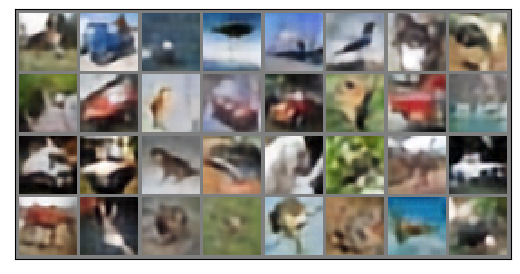

In [61]:
show(make_grid(valid_reconstructions.cpu().data)+0.5, )

**Question:** Are you happy with the image quality? If not, then run this for larger epochs, the quality is expected to improve. 
Try num of training updates: 500, 1000, 1500, 5000, 10000 (if possible!) and save figures and notebook and upload in moodle. 

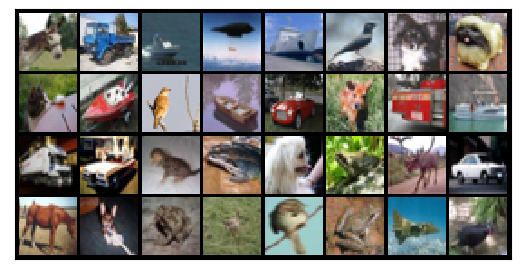

In [62]:
show(make_grid(valid_originals.cpu()+0.5))

# Projection and Visualization of VQ-VAE Embeddings

The code snippet below is using UMAP (Uniform Manifold Approximation and Projection), a dimensionality reduction technique, to visualize or analyze high-dimensional data in a lower-dimensional space. 

UMAP paper: [paper](https://arxiv.org/abs/1802.03426)

t-SNE based visualization: [paper](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

UMAP is particularly popular for its ability to preserve both the local and global structure of the data, making it highly suitable for tasks such as visualization of complex datasets, including embeddings in machine learning. Let's break down the elements of this code:

### UMAP Parameters
- **`n_neighbors=3`**: This parameter controls how UMAP balances local versus global structure in the data. It determines the number of neighboring points used in the local manifold approximation. A smaller number makes UMAP focus more on the local structure, while a larger value helps capture more of the global structure.

- **`min_dist=0.1`**: This parameter sets the minimum distance between points in the low-dimensional projection. The smaller the value, the closer UMAP will try to pack points together, which can be useful for emphasizing clusters or local groupings in the data.

- **`metric='cosine'`**: This specifies the metric used to measure distance in the input space. The cosine similarity is a common choice for high-dimensional data, especially when dealing with text or other types of data where the magnitude of the data vectors is not as important as their direction or angle.

### Application to Model Embeddings
- **`model._vq_vae._embedding.weight.data.cpu()`**: This extracts the weights of the embeddings from a Vector Quantizer within a VQ-VAE model. The embeddings represent the learned discrete representations of the input data. 
  - **`model._vq_vae._embedding`**: Refers to the embedding layer of the vector quantizer used in the VQ-VAE model.
  - **`weight.data`**: Retrieves the actual parameters (weights) of the embedding layer, which are the focus of the dimensionality reduction.
  - **`cpu()`**: Ensures that the tensor containing these weights is moved to the CPU. This is necessary because UMAP and many other non-PyTorch libraries do not support CUDA tensors (tensors on GPU).

### UMAP Execution
- **`umap.UMAP(...).fit_transform(...)`**: This function call does two things:
  1. **`fit`**: UMAP fits to the provided high-dimensional data, learning how it can best be represented in lower dimensions.
  2. **`transform`**: Transforms the high-dimensional data into the lower-dimensional space according to the fit.

### Use Cases
The resulting projection `proj` can be used for various purposes such as:
- **Visualization**: The low-dimensional space can be plotted, typically in 2D or 3D, to visualize the structure of the data and discover patterns such as clusters.
- **Analysis**: The projections can be analyzed to understand relationships and distances between different points in the embedding space, which can provide insights into how well the VQ-VAE model is capturing the variations in the data.

In summary, this code effectively applies UMAP to reduce the dimensionality of the embedding weights from a VQ-VAE model. The aim is to aid in visualizing or analyzing the embeddings, which can be crucial for understanding and interpreting the behavior of complex machine learning models.

In [63]:
proj = umap.UMAP(n_neighbors=3,
                 min_dist=0.1,
                 metric='cosine').fit_transform(model._vq_vae._embedding.weight.data.cpu())

**Question:** Write your observation after looking at the plot below. Save the figure and upload alongwith this notebook.

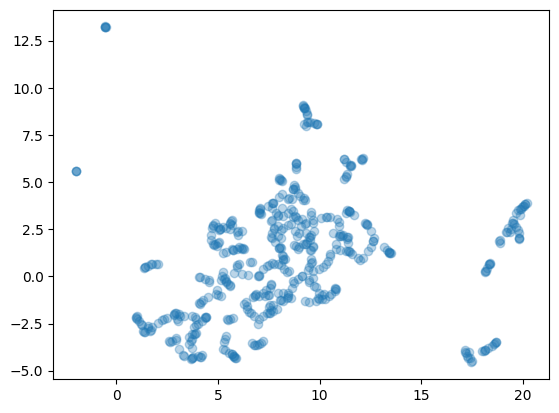

In [64]:
plt.scatter(proj[:,0], proj[:,1], alpha=0.3)

> Observation: The above plot is the projection of the codebook vectors in the 2d space. We can observe certain clusters being formed, although not very distinct. Currently, we are using 512 embedding vectors which might be too many for the CIFAR dataset. We can try reducing this number which might enable us the get well clustered 2D projections. 

**Question:** Implement t-SNE based visualization for these data: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html and show generated figure

/home2/md.faizal/miniforge3/envs/cong/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


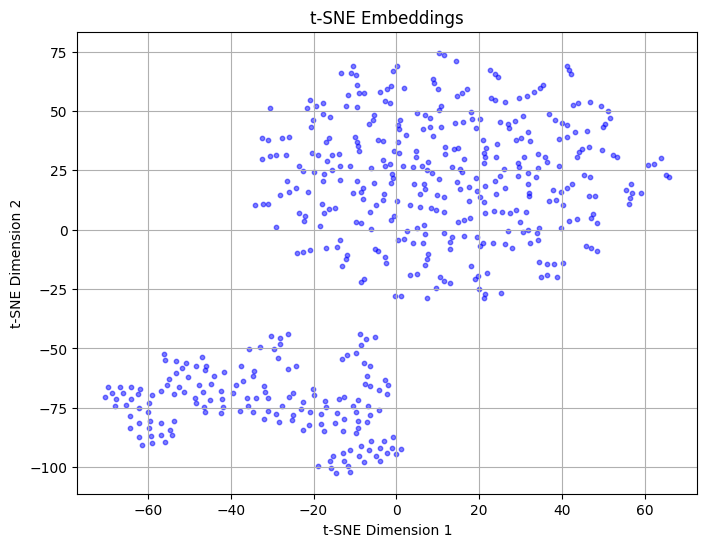

In [65]:
from sklearn.manifold import TSNE

embedding_weights = model._vq_vae._embedding.weight.data.cpu().numpy()
tsne = TSNE(n_components=2, perplexity=10, n_iter=10000, learning_rate='auto', init='pca')
embedding_tsne = tsne.fit_transform(embedding_weights)

plt.figure(figsize=(8, 6))
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, c='b', alpha=0.5)
plt.title('t-SNE Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()